In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# For Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# For K Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

plt.style.use("ggplot")

# Data Exploration

In [81]:
df_1=pd.read_csv("sales_data.csv")
df_2=pd.read_csv("outlets_data.csv")
df_4=pd.read_csv('freezer_data.csv')
df_3=pd.read_csv('product_data.csv')
df_5=pd.read_csv('week_data.csv')

In [82]:
df_1.shape

(10, 4)

In [83]:
print(df_1.head())

null_counts = df_1.isnull().sum()
print(null_counts)

  Row Labels  Sum of total vlume  Sum of total sales  rank
0        IP3           1036253.2           113987852     1
1        IP2           1030783.2            92770488     2
2        IP1           1023574.2           102357420     3
3        IP5           1022602.4           102260240     4
4        IP4           1017999.0           101799900     5
Row Labels            0
Sum of total vlume    0
Sum of total sales    0
rank                  0
dtype: int64


In [84]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sum of total vlume,10.0,969977.9,5.972967e+04,903481.0,9.144282e+05,970151.5,1.023331e+06,1.036253e+06
Sum of total sales,10.0,558580085.0,4.831235e+08,92770488.0,1.022845e+08,508734426.0,1.011804e+09,1.104698e+09
rank,10.0,5.5,3.027650e+00,1.0,3.250000e+00,5.5,7.750000e+00,1.000000e+01


In [85]:
df_2.shape

(988, 2)

In [86]:
print(df_2['Outlet_ID'].nunique())

951


In [87]:
print(df_2.head())
null_counts = df_2.isnull().sum()

null_counts

  Outlet_ID  area(sqft)
0    ID7203        5660
1    ID1878        4138
2    ID1740        5546
3    ID4366        5134
4    ID8358        4100


Outlet_ID     0
area(sqft)    0
dtype: int64

In [88]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
area(sqft),988.0,4288.656883,2451.617799,123.0,2325.75,3958.5,5836.0,9950.0


In [89]:
df_3.shape

(10, 6)

In [90]:
print(df_3.head())
null_counts = df_3.isnull().sum()
print(null_counts)

   pid  volume              product_name  price  cost    stock
0  IP3     0.2       Strawberry Tiny Cup    110  98.45  225000
1  IP2     0.2      Chocolate Petite Bar     90   79.2   75000
2  IP1     0.2         Vanilla Mini Cone    100     89  120000
3  IP5     0.2  Butter Pecan Small Stick    100   88.5  150000
4  IP4     0.2        Mint Bite-size Pop    100   89.5  200000
pid             0
volume          0
product_name    0
price           0
 cost           0
stock           0
dtype: int64


In [91]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,10.0,0.6,0.421637,0.2,0.2,0.6,1.0,1.0
price,10.0,605.0,534.628635,90.0,100.0,555.0,1100.0,1200.0
stock,10.0,80600.0,87224.104721,4000.0,8250.0,42500.0,142500.0,225000.0


# Data Preprocessing

### Remove duplicates

In [92]:
# is there any duplicate rows in df_1

duplicate_rows = df_1.duplicated(keep=False)
# print the duplicate rows
# print("Duplicate rows:")
df_1[duplicate_rows]

,Row Labels,Sum of total vlume,Sum of total sales,rank


In [93]:
# is there any duplicate rows in df_2

duplicate_rows = df_2.duplicated(keep=False)
# print the duplicate rows
print("Duplicate rows:")
df_2[duplicate_rows]

Duplicate rows:


,Outlet_ID,area(sqft)


In [94]:
# is there any duplicate rows

duplicate_rows = df_3.duplicated(keep=False)
# print the duplicate rows
print("Duplicate rows:")
df_3[duplicate_rows]

Duplicate rows:


,pid,volume,product_name,price,cost,stock


In [95]:
df_3.head()

,pid,volume,product_name,price,cost,stock
0,IP3,0.2,Strawberry Tiny Cup,110,98.45,225000
1,IP2,0.2,Chocolate Petite Bar,90,79.2,75000
2,IP1,0.2,Vanilla Mini Cone,100,89,120000
3,IP5,0.2,Butter Pecan Small Stick,100,88.5,150000
4,IP4,0.2,Mint Bite-size Pop,100,89.5,200000


In [96]:
df_3['price'] = df_3['price'].to_numpy()
df_3[' cost '] = df_3[' cost '].to_numpy()
df_3['price'] = df_3['price'].astype(float)
df_3[' cost '] = df_3[' cost '].str.replace(',', '').astype(float)
df_3['margin'] = df_3['price'] - df_3[' cost ']
df_3.head()

,pid,volume,product_name,price,cost,stock,margin
0,IP3,0.2,Strawberry Tiny Cup,110.0,98.45,225000,11.55
1,IP2,0.2,Chocolate Petite Bar,90.0,79.20,75000,10.80
2,IP1,0.2,Vanilla Mini Cone,100.0,89.00,120000,11.00
3,IP5,0.2,Butter Pecan Small Stick,100.0,88.50,150000,11.50
4,IP4,0.2,Mint Bite-size Pop,100.0,89.50,200000,10.50


In [97]:
df_1.head()

,Row Labels,Sum of total vlume,Sum of total sales,rank
0,IP3,1036253.2,113987852,1
1,IP2,1030783.2,92770488,2
2,IP1,1023574.2,102357420,3
3,IP5,1022602.4,102260240,4
4,IP4,1017999.0,101799900,5


In [98]:
df_1 = df_1.rename(columns={'Row Labels': 'pid'})

# Merge the two dataframes based on the common 'pid' column
df = pd.merge(df_1, df_3, on='pid')

df

,pid,Sum of total vlume,Sum of total sales,rank,volume,product_name,price,cost,stock,margin
0,IP3,1036253.2,113987852,1,0.2,Strawberry Tiny Cup,110.0,98.45,225000,11.55
1,IP2,1030783.2,92770488,2,0.2,Chocolate Petite Bar,90.0,79.20,75000,10.80
2,IP1,1023574.2,102357420,3,0.2,Vanilla Mini Cone,100.0,89.00,120000,11.00
3,IP5,1022602.4,102260240,4,0.2,Butter Pecan Small Stick,100.0,88.50,150000,11.50
4,IP4,1017999.0,101799900,5,0.2,Mint Bite-size Pop,100.0,89.50,200000,10.50
5,BP2,922304.0,1014534400,6,1.0,Moose Tracks Jumbo Cup,1100.0,924.00,8000,176.00
6,BP1,920582.0,1104698400,7,1.0,Chocolate Fudge Big Scoop,1200.0,1020.00,10000,180.00
7,BP5,912377.0,1003614700,8,1.0,Cookies and Cream Mega Tub,1100.0,918.50,4000,181.50
8,BP3,909823.0,1046296450,9,1.0,Mint Chocolate Chip Family Pack,1150.0,966.00,9000,184.00
9,BP4,903481.0,903481000,10,1.0,Rocky Road Mega Tub,1000.0,820.00,5000,180.00


In [99]:
df.columns

Index(['pid', 'Sum of total vlume', 'Sum of total sales', 'rank', 'volume',
       'product_name', 'price', ' cost ', 'stock', 'margin'],
      dtype='object')

In [100]:
# get the duplicate rows
duplicate_rows = df.duplicated(keep=False)

# print the duplicate rows
print("Duplicate rows:")
df[duplicate_rows]

Duplicate rows:


,pid,Sum of total vlume,Sum of total sales,rank,volume,product_name,price,cost,stock,margin


In [101]:
df.dtypes

pid                    object
Sum of total vlume    float64
Sum of total sales      int64
rank                    int64
volume                float64
product_name           object
price                 float64
 cost                 float64
stock                   int64
margin                float64
dtype: object

### Outliers

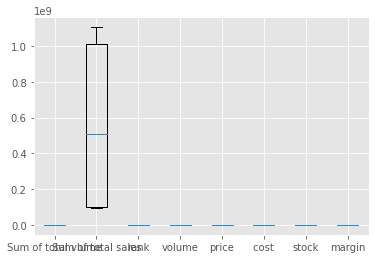

In [102]:
#to identify outliers
selected_df = df.loc[:, ~df.columns.isin([ 'pid', 'product_name'])]


# create a boxplot of the selected columns
plt.boxplot(selected_df.values, labels=selected_df.columns)
plt.show()

In [103]:
for col in selected_df:
    col_data = df[col]
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = ((col_data < lower_bound) | (col_data > upper_bound)).sum()
    percent_outliers = num_outliers / col_data.size * 100
    print(f'The percentage of outliers in column {col} is {percent_outliers:.2f}%.')

The percentage of outliers in column Sum of total vlume is 0.00%.
The percentage of outliers in column Sum of total sales is 0.00%.
The percentage of outliers in column rank is 0.00%.
The percentage of outliers in column volume is 0.00%.
The percentage of outliers in column price is 0.00%.
The percentage of outliers in column  cost  is 0.00%.
The percentage of outliers in column stock is 0.00%.
The percentage of outliers in column margin is 0.00%.


# Data Visualization

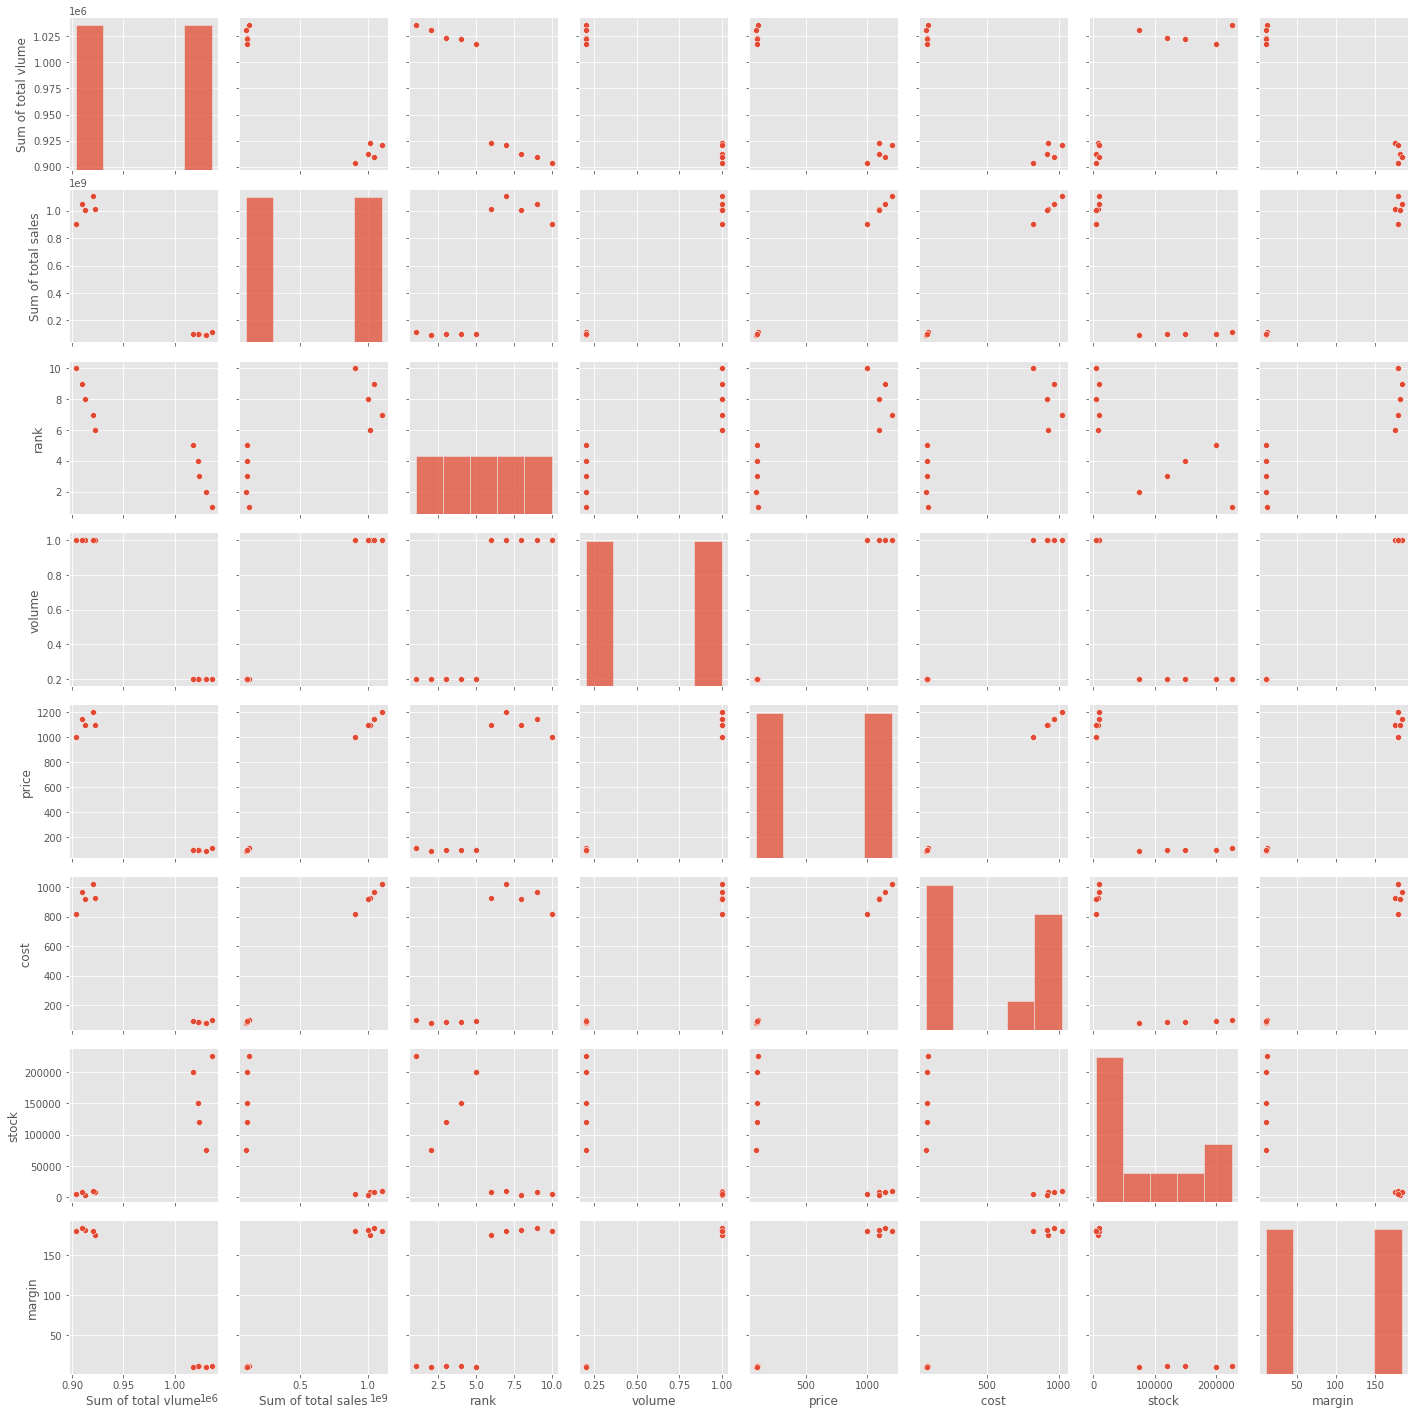

In [104]:
sns.pairplot(df)
plt.show()

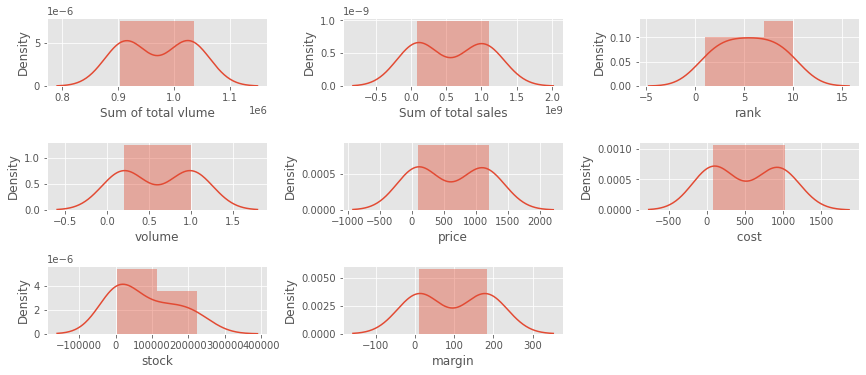

In [105]:
# univariate analysis

fig=plt.subplots(figsize=(12, 10))

for i, feature in enumerate(df.drop([ 'pid', 'product_name'], axis=1).columns):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(df[feature])
    plt.tight_layout()

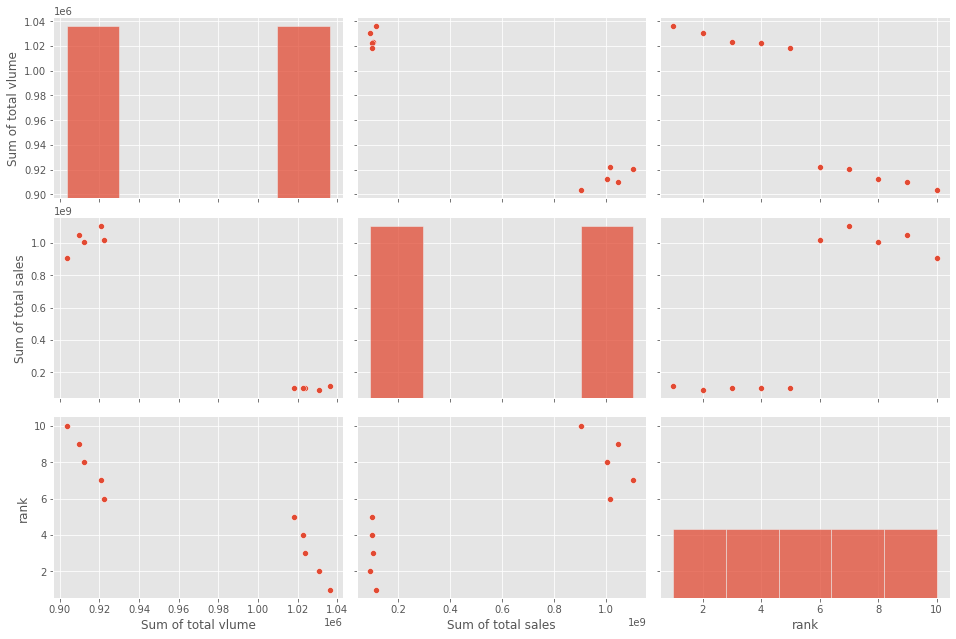

In [106]:
# Plot the pair plot
sns.pairplot(df_1, height=3, aspect=1.5)
plt.show()

# Creating new features 

In [107]:
df['Stock_Total_volume'] = df['stock'] * df['volume']
df.head()

,pid,Sum of total vlume,Sum of total sales,rank,volume,product_name,price,cost,stock,margin,Stock_Total_volume
0,IP3,1036253.2,113987852,1,0.2,Strawberry Tiny Cup,110.0,98.45,225000,11.55,45000.0
1,IP2,1030783.2,92770488,2,0.2,Chocolate Petite Bar,90.0,79.20,75000,10.80,15000.0
2,IP1,1023574.2,102357420,3,0.2,Vanilla Mini Cone,100.0,89.00,120000,11.00,24000.0
3,IP5,1022602.4,102260240,4,0.2,Butter Pecan Small Stick,100.0,88.50,150000,11.50,30000.0
4,IP4,1017999.0,101799900,5,0.2,Mint Bite-size Pop,100.0,89.50,200000,10.50,40000.0


In [108]:
df['Sum_of_total_Margin'] = df['Sum of total sales'] * df['margin']
df.head()

,pid,Sum of total vlume,Sum of total sales,rank,volume,product_name,price,cost,stock,margin,Stock_Total_volume,Sum_of_total_Margin
0,IP3,1036253.2,113987852,1,0.2,Strawberry Tiny Cup,110.0,98.45,225000,11.55,45000.0,1.316560e+09
1,IP2,1030783.2,92770488,2,0.2,Chocolate Petite Bar,90.0,79.20,75000,10.80,15000.0,1.001921e+09
2,IP1,1023574.2,102357420,3,0.2,Vanilla Mini Cone,100.0,89.00,120000,11.00,24000.0,1.125932e+09
3,IP5,1022602.4,102260240,4,0.2,Butter Pecan Small Stick,100.0,88.50,150000,11.50,30000.0,1.175993e+09
4,IP4,1017999.0,101799900,5,0.2,Mint Bite-size Pop,100.0,89.50,200000,10.50,40000.0,1.068899e+09


In [109]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sample dataset
for i in df:
    if i in ['rank','margin']:
        col_data = df[i]
        
        # Perform min-max scaling on the selected column
        scaled_data = (col_data - col_data.min()) / (col_data.max() - col_data.min())

        # Update the selected column in the original data frame with the scaled data
        df[i] = scaled_data
df.head()

,pid,Sum of total vlume,Sum of total sales,rank,volume,product_name,price,cost,stock,margin,Stock_Total_volume,Sum_of_total_Margin
0,IP3,1036253.2,113987852,0.000000,0.2,Strawberry Tiny Cup,110.0,98.45,225000,0.006052,45000.0,1.316560e+09
1,IP2,1030783.2,92770488,0.111111,0.2,Chocolate Petite Bar,90.0,79.20,75000,0.001729,15000.0,1.001921e+09
2,IP1,1023574.2,102357420,0.222222,0.2,Vanilla Mini Cone,100.0,89.00,120000,0.002882,24000.0,1.125932e+09
3,IP5,1022602.4,102260240,0.333333,0.2,Butter Pecan Small Stick,100.0,88.50,150000,0.005764,30000.0,1.175993e+09
4,IP4,1017999.0,101799900,0.444444,0.2,Mint Bite-size Pop,100.0,89.50,200000,0.000000,40000.0,1.068899e+09


In [110]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Subset dataframe
# df_subset = df[['pid', 'rank', 'margin']]

# # Sort by rank and margin
# df_subset.sort_values(by=['rank', 'margin'], ascending=[True, False], inplace=True)

# # Create pie chart
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.pie(df_subset['margin'], labels=df_subset['pid'], autopct='%1.1f%%')

# # Set title and legend
# ax.set_title('Pie Chart of Rank and Margin')
# ax.legend(df_subset['rank'])

# plt.show()



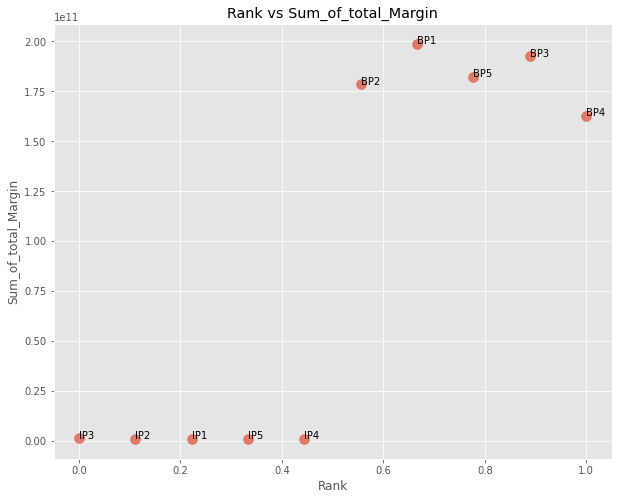

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Subset dataframe
df_subset = df[['pid', 'rank', 'Sum_of_total_Margin']]

# Sort by rank (ascending order)
df_subset.sort_values(by='rank', ascending=True, inplace=True)

# Set index to pid
df_subset.set_index('pid', inplace=True)

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df_subset['rank'], df_subset['Sum_of_total_Margin'], s=100, alpha=0.7)

# Add labels and title
ax.set_xlabel('Rank')
ax.set_ylabel('Sum_of_total_Margin')
ax.set_title('Rank vs Sum_of_total_Margin')

# Add text label for each point
for i, txt in enumerate(df_subset.index):
    ax.annotate(txt, (df_subset['rank'][i], df_subset['Sum_of_total_Margin'][i]))

plt.show()



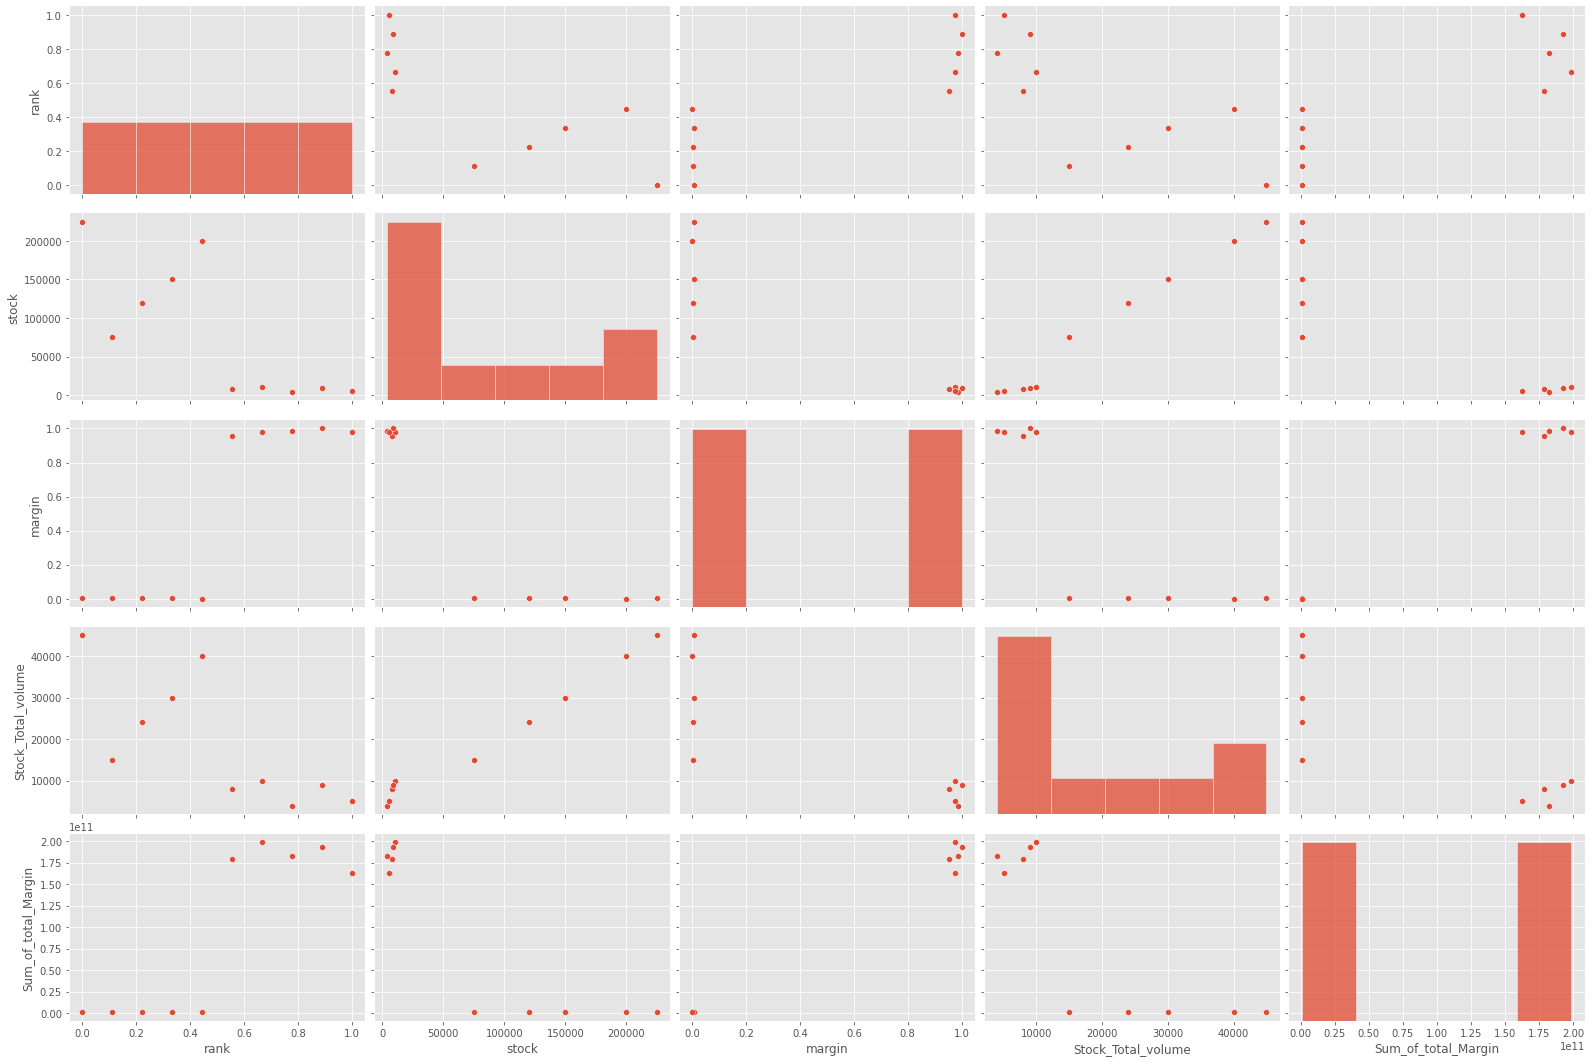

In [152]:
# Plot the pair plot #['pid', 'Sum of total vlume', 'Sum of total sales', 'rank', 'volume', 'product_name', 'price', ' cost ', 'stock', 'margin']
sns.pairplot(df.drop([ 'pid','Sum of total vlume','Sum of total sales','volume', 'product_name','price', ' cost '], axis=1), height=3, aspect=1.5)
plt.show()

In [112]:
df_sub=pd.read_csv("Submission_sem.csv")
df_sub=df_sub.drop('Unnamed: 0',axis=1)
df_sal=pd.read_csv("sales_data_of_product.csv")

In [113]:
df_sal.head()

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0


In [114]:
df0=df.copy()

In [115]:
df0 = df0.drop_duplicates()
df0.head()

,pid,Sum of total vlume,Sum of total sales,rank,volume,product_name,price,cost,stock,margin,Stock_Total_volume,Sum_of_total_Margin
0,IP3,1036253.2,113987852,0.000000,0.2,Strawberry Tiny Cup,110.0,98.45,225000,0.006052,45000.0,1.316560e+09
1,IP2,1030783.2,92770488,0.111111,0.2,Chocolate Petite Bar,90.0,79.20,75000,0.001729,15000.0,1.001921e+09
2,IP1,1023574.2,102357420,0.222222,0.2,Vanilla Mini Cone,100.0,89.00,120000,0.002882,24000.0,1.125932e+09
3,IP5,1022602.4,102260240,0.333333,0.2,Butter Pecan Small Stick,100.0,88.50,150000,0.005764,30000.0,1.175993e+09
4,IP4,1017999.0,101799900,0.444444,0.2,Mint Bite-size Pop,100.0,89.50,200000,0.000000,40000.0,1.068899e+09


In [116]:
df_sub

,Outlet_ID,Freezer
0,ID1008,M008
1,ID1012,M001
2,ID1024,M007
3,ID1029,M002
4,ID1036,M008
...,...,...
946,ID9960,M007
947,ID9971,M001
948,ID9973,M002
949,ID9979,M001


In [117]:
merged_df = pd.merge(df_sal, df_sub, on='Outlet_ID')

In [118]:
merged_df.head()

,Outlet_ID,week,pid,product_name,no_units,Freezer
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,M001
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,M001
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,M001
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,M001
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,M001


In [119]:
grouped_df = merged_df.groupby(['Outlet_ID', 'pid', 'product_name'])['no_units'].sum().reset_index()

print(grouped_df)

     Outlet_ID  pid              product_name  no_units
0       ID1008  IP1         Vanilla Mini Cone    6970.0
1       ID1008  IP2      Chocolate Petite Bar    7206.0
2       ID1008  IP3       Strawberry Tiny Cup    6285.0
3       ID1008  IP4        Mint Bite-size Pop    6486.0
4       ID1008  IP5  Butter Pecan Small Stick    6055.0
...        ...  ...                       ...       ...
7185    ID9980  IP1         Vanilla Mini Cone    6212.0
7186    ID9980  IP2      Chocolate Petite Bar    7888.0
7187    ID9980  IP3       Strawberry Tiny Cup    4999.0
7188    ID9980  IP4        Mint Bite-size Pop    9370.0
7189    ID9980  IP5  Butter Pecan Small Stick    8990.0

[7190 rows x 4 columns]


In [120]:
merged_df = pd.merge(grouped_df, df_sub, on='Outlet_ID')

In [121]:
merged_df

,Outlet_ID,pid,product_name,no_units,Freezer
0,ID1008,IP1,Vanilla Mini Cone,6970.0,M008
1,ID1008,IP2,Chocolate Petite Bar,7206.0,M008
2,ID1008,IP3,Strawberry Tiny Cup,6285.0,M008
3,ID1008,IP4,Mint Bite-size Pop,6486.0,M008
4,ID1008,IP5,Butter Pecan Small Stick,6055.0,M008
...,...,...,...,...,...
7185,ID9980,IP1,Vanilla Mini Cone,6212.0,M001
7186,ID9980,IP2,Chocolate Petite Bar,7888.0,M001
7187,ID9980,IP3,Strawberry Tiny Cup,4999.0,M001
7188,ID9980,IP4,Mint Bite-size Pop,9370.0,M001


In [122]:
merged_df = merged_df.rename(columns={'Freezer': 'Model Number'})

In [123]:
merged_df

,Outlet_ID,pid,product_name,no_units,Model Number
0,ID1008,IP1,Vanilla Mini Cone,6970.0,M008
1,ID1008,IP2,Chocolate Petite Bar,7206.0,M008
2,ID1008,IP3,Strawberry Tiny Cup,6285.0,M008
3,ID1008,IP4,Mint Bite-size Pop,6486.0,M008
4,ID1008,IP5,Butter Pecan Small Stick,6055.0,M008
...,...,...,...,...,...
7185,ID9980,IP1,Vanilla Mini Cone,6212.0,M001
7186,ID9980,IP2,Chocolate Petite Bar,7888.0,M001
7187,ID9980,IP3,Strawberry Tiny Cup,4999.0,M001
7188,ID9980,IP4,Mint Bite-size Pop,9370.0,M001


In [124]:
merged_2=pd.merge(merged_df, df_4, on='Model Number')

In [125]:
merged_2

,Outlet_ID,pid,product_name,no_units,Model Number,Freezer Name,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ID1008,IP1,Vanilla Mini Cone,6970.0,M008,FreezeTech 3.0,25,1600
1,ID1008,IP2,Chocolate Petite Bar,7206.0,M008,FreezeTech 3.0,25,1600
2,ID1008,IP3,Strawberry Tiny Cup,6285.0,M008,FreezeTech 3.0,25,1600
3,ID1008,IP4,Mint Bite-size Pop,6486.0,M008,FreezeTech 3.0,25,1600
4,ID1008,IP5,Butter Pecan Small Stick,6055.0,M008,FreezeTech 3.0,25,1600
...,...,...,...,...,...,...,...,...
7185,ID9903,IP1,Vanilla Mini Cone,4149.0,M006,IceBlast,65,2700
7186,ID9903,IP2,Chocolate Petite Bar,5754.0,M006,IceBlast,65,2700
7187,ID9903,IP3,Strawberry Tiny Cup,4341.0,M006,IceBlast,65,2700
7188,ID9903,IP4,Mint Bite-size Pop,3970.0,M006,IceBlast,65,2700


In [126]:
merged_2=merged_2.drop(['Freezer Name','Power and maitainance Cost (LKR) per 100 hours'],axis=1)

In [127]:
merged_2

,Outlet_ID,pid,product_name,no_units,Model Number,Volume Capacity (Liters)
0,ID1008,IP1,Vanilla Mini Cone,6970.0,M008,25
1,ID1008,IP2,Chocolate Petite Bar,7206.0,M008,25
2,ID1008,IP3,Strawberry Tiny Cup,6285.0,M008,25
3,ID1008,IP4,Mint Bite-size Pop,6486.0,M008,25
4,ID1008,IP5,Butter Pecan Small Stick,6055.0,M008,25
...,...,...,...,...,...,...
7185,ID9903,IP1,Vanilla Mini Cone,4149.0,M006,65
7186,ID9903,IP2,Chocolate Petite Bar,5754.0,M006,65
7187,ID9903,IP3,Strawberry Tiny Cup,4341.0,M006,65
7188,ID9903,IP4,Mint Bite-size Pop,3970.0,M006,65


In [128]:
merged_3=pd.merge(merged_2, df_3, on='pid')

In [129]:
merged_3 = merged_3.sort_values(by=['Outlet_ID','pid'], ascending=True)

In [130]:
merged_3.head()

,Outlet_ID,pid,product_name_x,no_units,Model Number,Volume Capacity (Liters),volume,product_name_y,price,cost,stock,margin
0,ID1008,IP1,Vanilla Mini Cone,6970.0,M008,25,0.2,Vanilla Mini Cone,100.0,89.00,120000,11.00
722,ID1008,IP2,Chocolate Petite Bar,7206.0,M008,25,0.2,Chocolate Petite Bar,90.0,79.20,75000,10.80
1444,ID1008,IP3,Strawberry Tiny Cup,6285.0,M008,25,0.2,Strawberry Tiny Cup,110.0,98.45,225000,11.55
2166,ID1008,IP4,Mint Bite-size Pop,6486.0,M008,25,0.2,Mint Bite-size Pop,100.0,89.50,200000,10.50
2888,ID1008,IP5,Butter Pecan Small Stick,6055.0,M008,25,0.2,Butter Pecan Small Stick,100.0,88.50,150000,11.50


In [131]:
grouped_df = merged_df.groupby(['Model Number', 'pid', 'product_name'])['no_units'].mean().reset_index()

In [132]:
df_mar=df[["pid","margin"]]

In [133]:
df_mar

,pid,margin
0,IP3,0.006052
1,IP2,0.001729
2,IP1,0.002882
3,IP5,0.005764
4,IP4,0.000000
5,BP2,0.953890
6,BP1,0.976945
7,BP5,0.985591
8,BP3,1.000000
9,BP4,0.976945


In [134]:
merged_4=pd.merge(merged_3, df_mar, on='pid')

In [135]:
merged_4=merged_4.drop("margin_x",axis=1)

In [136]:
merged_4 = merged_4.rename(columns={'margin_y': 'margin'})

In [137]:
merged_4 = merged_4.sort_values(by=['Outlet_ID','pid'], ascending=True)

In [138]:
merged_4 = merged_4.drop("product_name_y",axis=1)

In [139]:
merged_4 = merged_4.rename(columns={'product_name_x': 'product_name'})

In [140]:
merged_4["total_margin"]=merged_4["margin"]*merged_4["no_units"]

In [141]:
merged_4["total_volume"]=merged_4["volume"]*merged_4["no_units"]

In [142]:
merged_4

,Outlet_ID,pid,product_name,no_units,Model Number,Volume Capacity (Liters),volume,price,cost,stock,margin,total_margin,total_volume
0,ID1008,IP1,Vanilla Mini Cone,6970.0,M008,25,0.2,100.0,89.00,120000,0.002882,20.086455,1394.0
722,ID1008,IP2,Chocolate Petite Bar,7206.0,M008,25,0.2,90.0,79.20,75000,0.001729,12.459942,1441.2
1444,ID1008,IP3,Strawberry Tiny Cup,6285.0,M008,25,0.2,110.0,98.45,225000,0.006052,38.036023,1257.0
2166,ID1008,IP4,Mint Bite-size Pop,6486.0,M008,25,0.2,100.0,89.50,200000,0.000000,0.000000,1297.2
2888,ID1008,IP5,Butter Pecan Small Stick,6055.0,M008,25,0.2,100.0,88.50,150000,0.005764,34.899135,1211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,ID9980,IP1,Vanilla Mini Cone,6212.0,M001,55,0.2,100.0,89.00,120000,0.002882,17.902017,1242.4
1443,ID9980,IP2,Chocolate Petite Bar,7888.0,M001,55,0.2,90.0,79.20,75000,0.001729,13.639193,1577.6
2165,ID9980,IP3,Strawberry Tiny Cup,4999.0,M001,55,0.2,110.0,98.45,225000,0.006052,30.253314,999.8
2887,ID9980,IP4,Mint Bite-size Pop,9370.0,M001,55,0.2,100.0,89.50,200000,0.000000,0.000000,1874.0


In [143]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sample dataset
for i in merged_4:
    if i in ['rank','margin','total_margin','total_volume']:
        col_data = merged_4[i]
        
        # Perform min-max scaling on the selected column
        scaled_data = (col_data - col_data.min()) / (col_data.max() - col_data.min())

        # Update the selected column in the original data frame with the scaled data
        merged_4[i] = scaled_data
merged_4.head()

,Outlet_ID,pid,product_name,no_units,Model Number,Volume Capacity (Liters),volume,price,cost,stock,margin,total_margin,total_volume
0,ID1008,IP1,Vanilla Mini Cone,6970.0,M008,25,0.2,100.0,89.00,120000,0.002882,0.003949,0.224003
722,ID1008,IP2,Chocolate Petite Bar,7206.0,M008,25,0.2,90.0,79.20,75000,0.001729,0.002450,0.233726
1444,ID1008,IP3,Strawberry Tiny Cup,6285.0,M008,25,0.2,110.0,98.45,225000,0.006052,0.007478,0.195781
2166,ID1008,IP4,Mint Bite-size Pop,6486.0,M008,25,0.2,100.0,89.50,200000,0.000000,0.000000,0.204062
2888,ID1008,IP5,Butter Pecan Small Stick,6055.0,M008,25,0.2,100.0,88.50,150000,0.005764,0.006861,0.186305


In [149]:
# define a function to rank products for a given Outlet_ID
def rank_products(df, outlet_id):
    # subset the dataframe for the given outlet_id
    outlet_df = df[df['Outlet_ID'] == outlet_id]
    
    # create a new column called "rank" with initial values of 0
    outlet_df['rank'] = 0
    
    # sort the dataframe in descending order by total_margin and total_volume
    outlet_df = outlet_df.sort_values(by=['total_margin', 'total_volume'], ascending=False)
    
    # assign ranks to each product
    num_products = outlet_df.shape[0]
    outlet_df['rank'] = range(1, num_products+1)
    
    # return the ranked dataframe
    return outlet_df


In [150]:
# rank the products for Outlet_ID = 123
ranked_products = rank_products(merged_4, 123)

# display the top 10 ranked products
print(ranked_products.head(10))


Empty DataFrame
Columns: [Outlet_ID, pid, product_name, no_units, Model Number, Volume Capacity (Liters), volume, price,  cost , stock, margin, total_margin, total_volume, rank]
Index: []


### Correlations

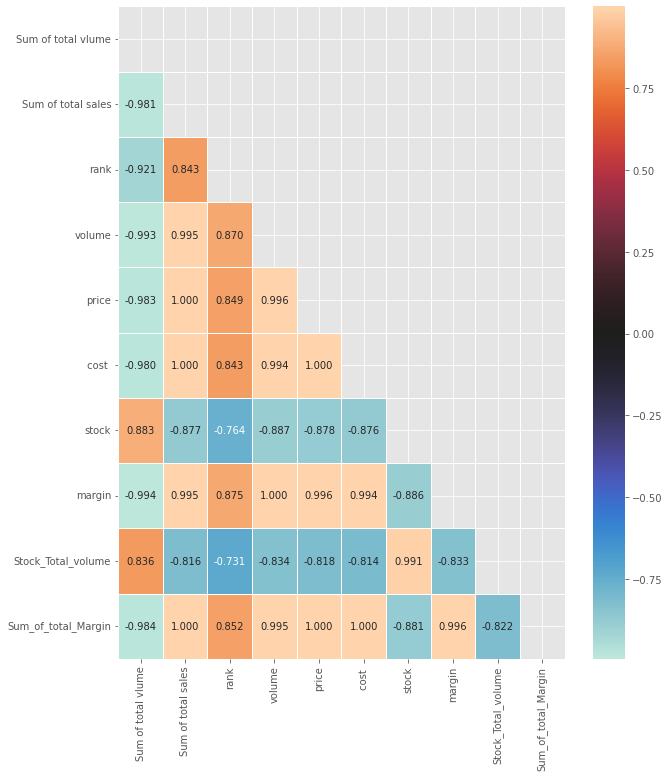

In [74]:
selected_df = df0 #.loc[:, ~df.columns.isin(['Outlet_ID', 'week', 'pid', 'product_name'])]
corr=selected_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(10,12)) 
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".3f", ax = ax)
plt.show()

In [155]:
df0.head()

,pid,Sum of total vlume,Sum of total sales,rank,volume,product_name,price,cost,stock,margin,Stock_Total_volume,Sum_of_total_Margin
0,IP3,1036253.2,113987852,0.000000,0.2,Strawberry Tiny Cup,110.0,98.45,225000,0.006052,45000.0,1.316560e+09
1,IP2,1030783.2,92770488,0.111111,0.2,Chocolate Petite Bar,90.0,79.20,75000,0.001729,15000.0,1.001921e+09
2,IP1,1023574.2,102357420,0.222222,0.2,Vanilla Mini Cone,100.0,89.00,120000,0.002882,24000.0,1.125932e+09
3,IP5,1022602.4,102260240,0.333333,0.2,Butter Pecan Small Stick,100.0,88.50,150000,0.005764,30000.0,1.175993e+09
4,IP4,1017999.0,101799900,0.444444,0.2,Mint Bite-size Pop,100.0,89.50,200000,0.000000,40000.0,1.068899e+09


In [164]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sample dataset
for i in df0:
    if i in ['rank','margin',"Stock_Total_volume","stock"]:
        col_data = df0[i]
        
        # Perform min-max scaling on the selected column
        scaled_data = (col_data - col_data.min()) / (col_data.max() - col_data.min())

        # Update the selected column in the original data frame with the scaled data
        df0[i]= scaled_data
df0.head()

,pid,Sum of total vlume,Sum of total sales,rank,volume,product_name,price,cost,stock,margin,Stock_Total_volume,Sum_of_total_Margin
0,IP3,1036253.2,113987852,0.000000,0.2,Strawberry Tiny Cup,110.0,98.45,1.000000,0.006052,1.000000,1.316560e+09
1,IP2,1030783.2,92770488,0.111111,0.2,Chocolate Petite Bar,90.0,79.20,0.321267,0.001729,0.268293,1.001921e+09
2,IP1,1023574.2,102357420,0.222222,0.2,Vanilla Mini Cone,100.0,89.00,0.524887,0.002882,0.487805,1.125932e+09
3,IP5,1022602.4,102260240,0.333333,0.2,Butter Pecan Small Stick,100.0,88.50,0.660633,0.005764,0.634146,1.175993e+09
4,IP4,1017999.0,101799900,0.444444,0.2,Mint Bite-size Pop,100.0,89.50,0.886878,0.000000,0.878049,1.068899e+09


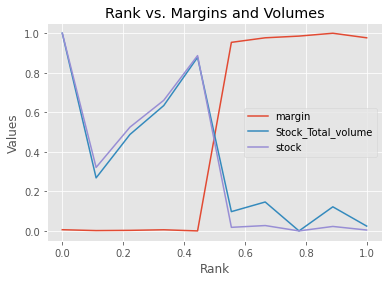

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df0.plot(x='rank', y=['margin', 'Stock_Total_volume', 'stock'])

plt.xlabel('Rank')
plt.ylabel('Values')
plt.title('Rank vs. Margins and Volumes')

plt.show()


In [168]:
df_merged = merged_4.loc[:, ["Outlet_ID", "pid", "product_name", "Model Number", "Volume Capacity (Liters)"]]
df_merged

,Outlet_ID,pid,product_name,Model Number,Volume Capacity (Liters)
0,ID1008,IP1,Vanilla Mini Cone,M008,25
722,ID1008,IP2,Chocolate Petite Bar,M008,25
1444,ID1008,IP3,Strawberry Tiny Cup,M008,25
2166,ID1008,IP4,Mint Bite-size Pop,M008,25
2888,ID1008,IP5,Butter Pecan Small Stick,M008,25
...,...,...,...,...,...
721,ID9980,IP1,Vanilla Mini Cone,M001,55
1443,ID9980,IP2,Chocolate Petite Bar,M001,55
2165,ID9980,IP3,Strawberry Tiny Cup,M001,55
2887,ID9980,IP4,Mint Bite-size Pop,M001,55


In [170]:
df_merged["Outlet_ID"]="Store segment"

In [171]:
df_merged["Model Number"]="Recommended Freezer type"

In [172]:
df_merged["Volume Capacity (Liters)"]="Freezer Volume"